In [39]:
import sys 
import os 
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import re
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import metrics as metrics_sk
from sklearn.metrics import precision_recall_curve
from scipy.stats import ks_2samp
from IPython.display import Image, display_svg, SVG
from scipy.stats import chisquare
from scipy.stats import mannwhitneyu
from scipy.stats import pearsonr
import numpy.ma as ma

In [40]:
pd.set_option('display.max_columns', None)

In [41]:
os.chdir("C:/Users/Benedito/Desktop/MECAI/Introdução a Estatistica/MVP")

In [42]:
os.getcwd()

'C:\\Users\\Benedito\\Desktop\\MECAI\\Introdução a Estatistica\\MVP'

In [43]:
df = pd.read_csv("modelling_table_7.csv")

In [44]:
df.head()

,Unnamed: 0,SK_ID_CURR,TARGET,mean_knn_target,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,SUM(previous.CNT_PAYMENT),amt_credit_sum_consumer_credit_bureau,avg_pos_cash_cnt_installment_future_previous,CODE_GENDER_M,amt_credit_sum_debt_credit_card_bureau,cnt_refused_previous,NAME_CONTRACT_TYPE_Revolving loans,max_pos_cash_sk_dpd_def_previous,SUM(previous.DAYS_FIRST_DRAWING),amt_paid_down,NAME_EDUCATION_TYPE_Higher education,STD(previous.DAYS_FIRST_DRAWING),NAME_FAMILY_STATUS_Married,MIN(previous.CNT_PAYMENT),cnt_yield_low_normal_previous,avg_amt_application_previous,credit_income_ratio,remaining_pmts,OCCUPATION_TYPE_Sales staff,MAX(previous.NFLAG_LAST_APPL_IN_DAY),FLAG_EMAIL,missing_rate,REGION_RATING_CLIENT_W_CITY_2,COUNT(bureau),gap_avg_application_credit_previous,days_phone_change_over_gap_amt_installment,FLAG_OWN_CAR_Y,avg_pos_cash_cnt_installment_previous,NAME_EDUCATION_TYPE_Secondary / secondary special,YEARS_BUILD_MODE,UI_credit_card_bureau,ENTRANCES_AVG,num_loans_l1m,STD(bureau.CREDIT_DAY_OVERDUE),STD(previous.AMT_GOODS_PRICE),max_interest_rate_privileged_previous,cnt_contracts_bureau,SKEW(previous.DAYS_TERMINATION),MEAN(previous.DAYS_LAST_DUE_1ST_VERSION),MIN(previous.AMT_APPLICATION),MIN(bureau.DAYS_CREDIT),delinquency_6_mths_consumer_credit_bureau,MAX(previous.DAYS_FIRST_DRAWING),NAME_EDUCATION_TYPE_Lower secondary,MIN(previous.HOUR_APPR_PROCESS_START),avg_amt_credit_card_receivable_principal_previous,MEAN(bureau.AMT_CREDIT_SUM),amt_credit_max_overdue_bureau,DAYS_ID_PUBLISH,tot_debt_lim_ratio,avg_amt_credit_card_total_receivable_previous,max_interest_rate_primary_previous,MEDIAN(previous.NFLAG_INSURED_ON_APPROVAL),num_loans_l6m,STD(bureau.DAYS_CREDIT),MEAN(previous.RATE_INTEREST_PRIMARY),FLOORSMIN_AVG,SUM(bureau.AMT_CREDIT_SUM_DEBT),avg_cnt_credit_card_drawings_atm_previous,APARTMENTS_MEDI,LIVINGAREA_MODE,delinquency_12_24_mths_microloan_bureau,SKEW(bureau.DAYS_CREDIT),LANDAREA_AVG,num_loans_l3m,FLAG_DOCUMENT_13,MAX(bureau.AMT_CREDIT_SUM_DEBT),MAX(previous.CNT_PAYMENT),delinquency_6_12_mths_credit_card_bureau,MAX(bureau.AMT_CREDIT_SUM_LIMIT),MEAN(previous.AMT_CREDIT),MAX(bureau.DAYS_CREDIT_UPDATE),WALLSMATERIAL_MODE_Monolithic,avg_amt_credit_card_drawings_atm_previous,MEDIAN(previous.CNT_PAYMENT),avg_cnt_credit_card_instalment_mature_cum_previous,FLAG_PHONE,YEARS_BEGINEXPLUATATION_AVG,SUM(previous.DAYS_TERMINATION),income_over_credit,days_phone_change_times_gap_days_installment,SUM(previous.AMT_GOODS_PRICE),LANDAREA_MEDI,max_cnt_payment_previous,SUM(bureau.AMT_CREDIT_SUM_OVERDUE),MEAN(previous.NFLAG_LAST_APPL_IN_DAY),MIN(previous.RATE_DOWN_PAYMENT),SKEW(bureau.AMT_CREDIT_SUM_LIMIT),SUM(previous.RATE_DOWN_PAYMENT),cnt_portfolio_cash_previous,MEDIAN(bureau.CNT_CREDIT_PROLONG),SKEW(previous.DAYS_DECISION),NAME_INCOME_TYPE_State servant,STD(previous.AMT_CREDIT),MEAN(bureau.DAYS_ENDDATE_FACT),NAME_TYPE_SUITE_Other_A,FLOORSMIN_MEDI,DEF_30_CNT_SOCIAL_CIRCLE,REG_REGION_NOT_WORK_REGION,SKEW(bureau.AMT_CREDIT_MAX_OVERDUE),NONLIVINGAREA_MEDI,delinquency_6_12_mths_microloan_bureau,avg_amt_credit_card_recivable_previous,delinquency_long_total_bureau,FLAG_WORK_PHONE,cnt_channel_contact_center_previous,SUM(previous.DAYS_FIRST_DUE),OWN_CAR_AGE,AMT_GOODS_PRICE,cnt_appl_previous,delinquency_12_24_mths_consumer_credit_bureau,cnt_cash_previous,NAME_TYPE_SUITE_Family,MEAN(previous.AMT_DOWN_PAYMENT),FLAG_DOCUMENT_3,NAME_TYPE_SUITE_Group of people,cnt_seller_furniture_previous,delinquency_6_12_mths_total_bureau,CODE_GENDER_XNA,amt_credit_sum_working_capital_bureau,MEDIAN(previous.RATE_DOWN_PAYMENT),DAYS_REGISTRATION,DEF_60_CNT_SOCIAL_CIRCLE,SUM(bureau.DAYS_CREDIT_ENDDATE),MIN(bureau.DAYS_CREDIT_ENDDATE),delinquency_24_36_mths_consumer_credit_bureau,MAX(previous.AMT_DOWN_PAYMENT),UI_credit_sum_total_bureau,SKEW(bureau.DAYS_ENDDATE_FACT),SKEW(previous.AMT_DOWN_PAYMENT),NAME_INCOME_TYPE_Student,MEDIAN(bureau.DAYS_CREDIT_UPDATE),credit_income_cluster_4,YEARS_BEGINEXPLUATATION_MEDI,NAME_HOUSING_TYPE_Office apartment,max_credit_card_sk_dpd_def_previous

In [45]:
data = df

In [46]:
data = data.drop(['Unnamed: 0'], axis = 1)

In [47]:
data.set_index('SK_ID_CURR', inplace=True)

In [48]:
data = data.replace([np.inf, -np.inf], 0)

In [49]:
data.head()

,TARGET,mean_knn_target,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,SUM(previous.CNT_PAYMENT),amt_credit_sum_consumer_credit_bureau,avg_pos_cash_cnt_installment_future_previous,CODE_GENDER_M,amt_credit_sum_debt_credit_card_bureau,cnt_refused_previous,NAME_CONTRACT_TYPE_Revolving loans,max_pos_cash_sk_dpd_def_previous,SUM(previous.DAYS_FIRST_DRAWING),amt_paid_down,NAME_EDUCATION_TYPE_Higher education,STD(previous.DAYS_FIRST_DRAWING),NAME_FAMILY_STATUS_Married,MIN(previous.CNT_PAYMENT),cnt_yield_low_normal_previous,avg_amt_application_previous,credit_income_ratio,remaining_pmts,OCCUPATION_TYPE_Sales staff,MAX(previous.NFLAG_LAST_APPL_IN_DAY),FLAG_EMAIL,missing_rate,REGION_RATING_CLIENT_W_CITY_2,COUNT(bureau),gap_avg_application_credit_previous,days_phone_change_over_gap_amt_installment,FLAG_OWN_CAR_Y,avg_pos_cash_cnt_installment_previous,NAME_EDUCATION_TYPE_Secondary / secondary special,YEARS_BUILD_MODE,UI_credit_card_bureau,ENTRANCES_AVG,num_loans_l1m,STD(bureau.CREDIT_DAY_OVERDUE),STD(previous.AMT_GOODS_PRICE),max_interest_rate_privileged_previous,cnt_contracts_bureau,SKEW(previous.DAYS_TERMINATION),MEAN(previous.DAYS_LAST_DUE_1ST_VERSION),MIN(previous.AMT_APPLICATION),MIN(bureau.DAYS_CREDIT),delinquency_6_mths_consumer_credit_bureau,MAX(previous.DAYS_FIRST_DRAWING),NAME_EDUCATION_TYPE_Lower secondary,MIN(previous.HOUR_APPR_PROCESS_START),avg_amt_credit_card_receivable_principal_previous,MEAN(bureau.AMT_CREDIT_SUM),amt_credit_max_overdue_bureau,DAYS_ID_PUBLISH,tot_debt_lim_ratio,avg_amt_credit_card_total_receivable_previous,max_interest_rate_primary_previous,MEDIAN(previous.NFLAG_INSURED_ON_APPROVAL),num_loans_l6m,STD(bureau.DAYS_CREDIT),MEAN(previous.RATE_INTEREST_PRIMARY),FLOORSMIN_AVG,SUM(bureau.AMT_CREDIT_SUM_DEBT),avg_cnt_credit_card_drawings_atm_previous,APARTMENTS_MEDI,LIVINGAREA_MODE,delinquency_12_24_mths_microloan_bureau,SKEW(bureau.DAYS_CREDIT),LANDAREA_AVG,num_loans_l3m,FLAG_DOCUMENT_13,MAX(bureau.AMT_CREDIT_SUM_DEBT),MAX(previous.CNT_PAYMENT),delinquency_6_12_mths_credit_card_bureau,MAX(bureau.AMT_CREDIT_SUM_LIMIT),MEAN(previous.AMT_CREDIT),MAX(bureau.DAYS_CREDIT_UPDATE),WALLSMATERIAL_MODE_Monolithic,avg_amt_credit_card_drawings_atm_previous,MEDIAN(previous.CNT_PAYMENT),avg_cnt_credit_card_instalment_mature_cum_previous,FLAG_PHONE,YEARS_BEGINEXPLUATATION_AVG,SUM(previous.DAYS_TERMINATION),income_over_credit,days_phone_change_times_gap_days_installment,SUM(previous.AMT_GOODS_PRICE),LANDAREA_MEDI,max_cnt_payment_previous,SUM(bureau.AMT_CREDIT_SUM_OVERDUE),MEAN(previous.NFLAG_LAST_APPL_IN_DAY),MIN(previous.RATE_DOWN_PAYMENT),SKEW(bureau.AMT_CREDIT_SUM_LIMIT),SUM(previous.RATE_DOWN_PAYMENT),cnt_portfolio_cash_previous,MEDIAN(bureau.CNT_CREDIT_PROLONG),SKEW(previous.DAYS_DECISION),NAME_INCOME_TYPE_State servant,STD(previous.AMT_CREDIT),MEAN(bureau.DAYS_ENDDATE_FACT),NAME_TYPE_SUITE_Other_A,FLOORSMIN_MEDI,DEF_30_CNT_SOCIAL_CIRCLE,REG_REGION_NOT_WORK_REGION,SKEW(bureau.AMT_CREDIT_MAX_OVERDUE),NONLIVINGAREA_MEDI,delinquency_6_12_mths_microloan_bureau,avg_amt_credit_card_recivable_previous,delinquency_long_total_bureau,FLAG_WORK_PHONE,cnt_channel_contact_center_previous,SUM(previous.DAYS_FIRST_DUE),OWN_CAR_AGE,AMT_GOODS_PRICE,cnt_appl_previous,delinquency_12_24_mths_consumer_credit_bureau,cnt_cash_previous,NAME_TYPE_SUITE_Family,MEAN(previous.AMT_DOWN_PAYMENT),FLAG_DOCUMENT_3,NAME_TYPE_SUITE_Group of people,cnt_seller_furniture_previous,delinquency_6_12_mths_total_bureau,CODE_GENDER_XNA,amt_credit_sum_working_capital_bureau,MEDIAN(previous.RATE_DOWN_PAYMENT),DAYS_REGISTRATION,DEF_60_CNT_SOCIAL_CIRCLE,SUM(bureau.DAYS_CREDIT_ENDDATE),MIN(bureau.DAYS_CREDIT_ENDDATE),delinquency_24_36_mths_consumer_credit_bureau,MAX(previous.AMT_DOWN_PAYMENT),UI_credit_sum_total_bureau,SKEW(bureau.DAYS_ENDDATE_FACT),SKEW(previous.AMT_DOWN_PAYMENT),NAME_INCOME_TYPE_Student,MEDIAN(bureau.DAYS_CREDIT_UPDATE),credit_income_cluster_4,YEARS_BEGINEXPLUATATION_MEDI,NAME_HOUSING_TYPE_Office apartment,max_credit_card_sk_dpd_def_previous,SKEW(previous.AMT_APP

# Using Decision Tree to transform some continuous variables

In [50]:
np.random.seed(11235)
sample = data.sample(50000, random_state = 11235)

In [51]:
valid = data[~data.index.isin(sample.index)].sample(10000, random_state = 11235)

In [52]:
X_train = sample.drop(['TARGET'], axis =1)
y_train = sample['TARGET']
X_valid = valid.drop(['TARGET'], axis = 1)
y_valid = valid['TARGET']

In [53]:
non_monotonic = ['credit_income_ratio', 'remaining_pmts', 'missing_rate', 
                'days_phone_change_over_gap_amt_installment',
                'YEARS_BUILD_MODE', 'ENTRANCES_AVG', 'DAYS_ID_PUBLISH', 'FLOORSMIN_AVG', 
                'APARTMENTS_MEDI', 'LIVINGAREA_MODE', 'YEARS_BEGINEXPLUATATION_AVG',
                'income_over_credit',
                'days_phone_change_times_gap_days_installment', 'FLOORSMIN_MEDI',
                'OWN_CAR_AGE', 'AMT_GOODS_PRICE', 'DAYS_REGISTRATION', 'FLOORSMIN_MODE', 
                'FLOORSMAX_AVG',
                 'cnt_appl_previous',
 'MAX(previous.DAYS_DECISION)',
 'MAX(previous.HOUR_APPR_PROCESS_START)',
 'MEAN(previous.NFLAG_LAST_APPL_IN_DAY)',
 'MIN(previous.HOUR_APPR_PROCESS_START)',
 'MEAN(previous.AMT_CREDIT)',
 'avg_amt_application_previous',
 'SUM(previous.AMT_GOODS_PRICE)',
 'SUM(previous.DAYS_FIRST_DRAWING)',
 'MAX(previous.DAYS_FIRST_DRAWING)',
 'SUM(previous.CNT_PAYMENT)',
 'MAX(previous.CNT_PAYMENT)',
 'max_cnt_payment_previous',
 'avg_pos_cash_cnt_installment_previous',
 'MEDIAN(previous.CNT_PAYMENT)',
 'MEDIAN(previous.AMT_CREDIT)',
 'MEDIAN(previous.AMT_APPLICATION)',
 'gap_avg_application_credit_previous',
 'MIN(bureau.DAYS_CREDIT)',
 'MEDIAN(bureau.DAYS_CREDIT_UPDATE)',
 'MAX(bureau.DAYS_CREDIT_UPDATE)',
 'MEAN(bureau.AMT_CREDIT_SUM)',
 'SUM(bureau.DAYS_CREDIT_ENDDATE)',
 'MIN(bureau.DAYS_CREDIT_ENDDATE)',
 'NONLIVINGAREA_MEDI',
 'STD(previous.AMT_CREDIT)',
 'MEAN(bureau.DAYS_ENDDATE_FACT)',
 'STD(bureau.DAYS_CREDIT)',
 'STD(previous.AMT_GOODS_PRICE)',
 'STD(previous.CNT_PAYMENT)',
 'amt_paid_down',
 'SUM(previous.RATE_DOWN_PAYMENT)',
 'MEAN(previous.AMT_DOWN_PAYMENT)',
 'MAX(previous.AMT_DOWN_PAYMENT)',
 'MIN(previous.CNT_PAYMENT)',
 'SKEW(previous.AMT_APPLICATION)',
 'SKEW(bureau.DAYS_CREDIT)',
 'SKEW(previous.DAYS_DECISION)',
 'SUM(bureau.AMT_CREDIT_SUM_DEBT)',
 'tot_debt_lim_ratio',
 'MAX(bureau.AMT_CREDIT_SUM_DEBT)',
 'cnt_seller_electronics_previous',
 'STD(bureau.DAYS_ENDDATE_FACT)',
 'cnt_cash_previous',
 'MEDIAN(previous.RATE_DOWN_PAYMENT)',
 'amt_credit_sum_consumer_credit_bureau',
 'cnt_yield_low_normal_previous',
 'MIN(previous.AMT_APPLICATION)',
 'cnt_product_xsell_previous',
 'cnt_portfolio_cash_previous',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'cnt_channel_contact_center_previous',
 'SKEW(previous.DAYS_TERMINATION)',
 'SKEW(bureau.DAYS_ENDDATE_FACT)',
 'cnt_refused_previous',
 'amt_credit_sum_debt_credit_card_bureau',
 'MIN(previous.RATE_DOWN_PAYMENT)',
 'SKEW(previous.AMT_DOWN_PAYMENT)',
 'num_loans_l6m',
 'down_payment_times_cnt_refused_previous',
 'max_installments_gap_amt_payment_previous',
 'cnt_yield_low_action_previous',
 'avg_amt_credit_card_total_receivable_previous',
 'avg_amt_credit_card_recivable_previous',
 'avg_cnt_credit_card_instalment_mature_cum_previous',
 'avg_amt_credit_card_receivable_principal_previous',
 'STD(previous.DAYS_FIRST_DRAWING)',
 'MAX(bureau.AMT_CREDIT_SUM_LIMIT)',
 'UI_credit_sum_total_bureau',
 'avg_cnt_credit_card_drawings_atm_previous',
 'avg_amt_credit_card_drawings_atm_previous',
 'SKEW(bureau.AMT_CREDIT_MAX_OVERDUE)',
 'SKEW(bureau.AMT_CREDIT_SUM_LIMIT)',
 'cnt_seller_furniture_previous',
 'UI_credit_card_bureau',
 'num_loans_l3m',
 'max_pos_cash_sk_dpd_def_previous',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'amt_credit_max_overdue_bureau',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'max_credit_card_sk_dpd_def_previous',
 'num_loans_l1m',
 'delinquency_6_mths_consumer_credit_bureau',
 'delinquency_6_12_mths_total_bureau',
 'max_interest_rate_privileged_previous',
 'max_interest_rate_primary_previous',
 'MEAN(previous.RATE_INTEREST_PRIMARY)',
 'SUM(bureau.AMT_CREDIT_SUM_OVERDUE)',
 'STD(bureau.CREDIT_DAY_OVERDUE)',
 'delinquency_long_total_bureau',
 'delinquency_6_12_mths_credit_card_bureau',
 'delinquency_12_24_mths_consumer_credit_bureau',
 'delinquency_24_36_mths_consumer_credit_bureau',
 'MEDIAN(bureau.CNT_CREDIT_PROLONG)',
 'amt_credit_sum_working_capital_bureau',
 'MEAN(previous.DAYS_LAST_DUE_1ST_VERSION)']

In [54]:
def evaluate_depth(X_train, X_valid, y_train, y_valid, non_monotonic):
    result = {}
    final_depth = {}
    
    depth = [2, 3, 4, 5, 6, 7, 8, 9, 10]
    scaler = StandardScaler()
    for feat in non_monotonic:
        feat_dict ={}
        for i in depth:    
            model = DecisionTreeClassifier(max_depth = i, min_samples_split=100, min_samples_leaf = 100, min_impurity_decrease=1e-07, random_state=11235)
            X_feat_train = scaler.fit_transform(np.array(X_train[feat]).reshape(-1,1))
            X_feat_valid = scaler.transform(np.array(X_valid[feat]).reshape(-1, 1))
            model.fit(X_feat_train, y_train)
            score = model.predict_proba(X_feat_valid)[:,1]
            roc = metrics_sk.roc_auc_score(y_valid,score)
            feat_dict[i]=roc
        result[feat] = feat_dict#{'depth': depth_, 'AUC': metric}
        #final_depth[feat]=max(result[feat], key = lambda k: result[feat][k])
    return result#, final_depth
        

In [55]:
def choose_opt_depth(result):
    opt_choice={}
    for feat in resultado.keys():
        opt_choice[feat]=max(result[feat], key = result[feat].get)
    return opt_choice
    

In [56]:
resultado = evaluate_depth(X_train, X_valid, y_train, y_valid, non_monotonic)
otimo = choose_opt_depth(resultado)

In [57]:
def monotonic_transform(X_train, y_train, non_monotonic, df, opt_choice):
    for feat in non_monotonic:
        scaler = StandardScaler()
        model = DecisionTreeClassifier(max_depth = opt_choice[feat], min_samples_split=100, min_samples_leaf = 100, min_impurity_decrease=1e-07, random_state=11235)
        X_feat_train = scaler.fit_transform(np.array(X_train[feat]).reshape(-1,1))
        df[feat] = scaler.transform(np.array(df[feat]).reshape(-1,1))
        model.fit(X_feat_train, y_train)
        df[feat+'_monotonic'] = model.predict_proba(np.array(df[feat]).reshape(-1,1))[:,1]
        df=df.drop([feat], axis = 1)
    return df
        
    

In [58]:
data_transformed_1 = data.copy()

In [59]:
data_transformed_1 = monotonic_transform(X_train, y_train, non_monotonic, data, otimo)

## Plotting to verify whether the transformation worked

C:\Anaconda3\envs\benedito_deep\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


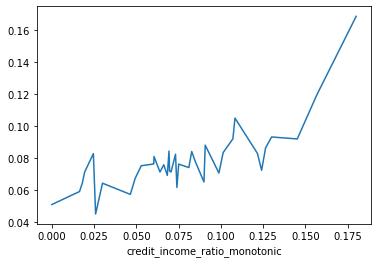

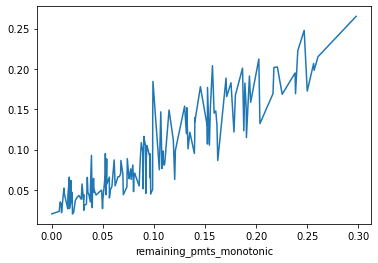

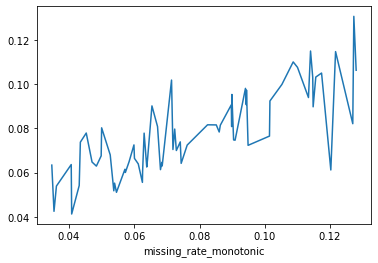

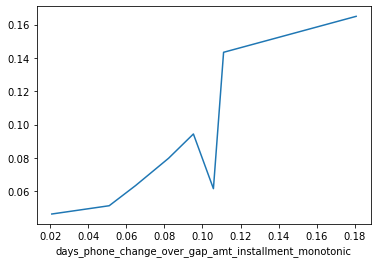

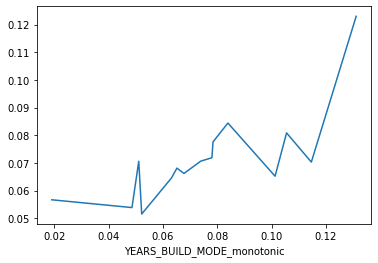

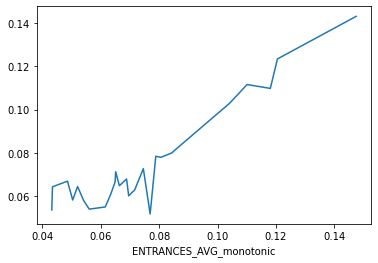

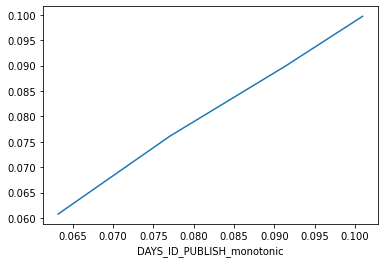

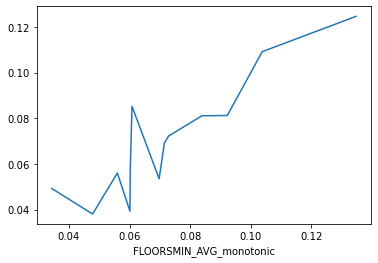

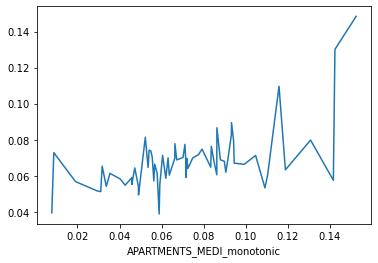

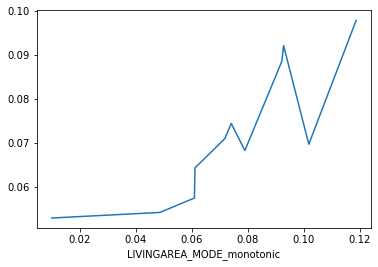

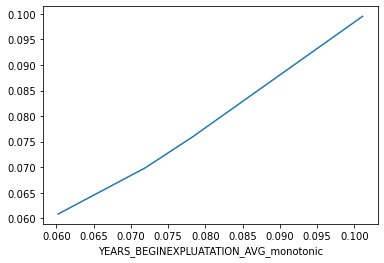

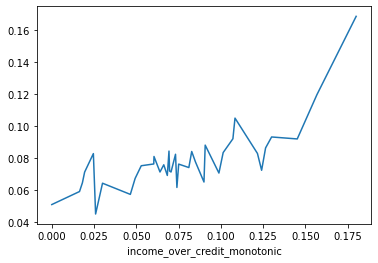

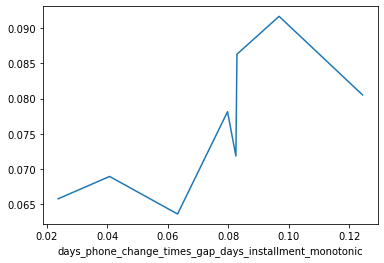

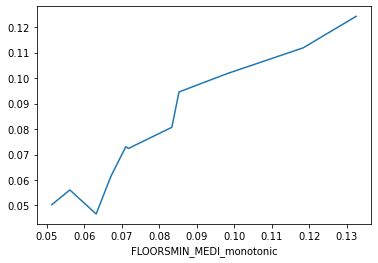

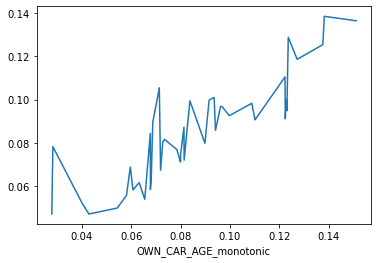

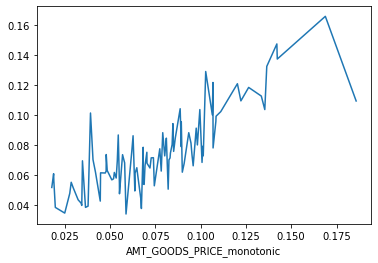

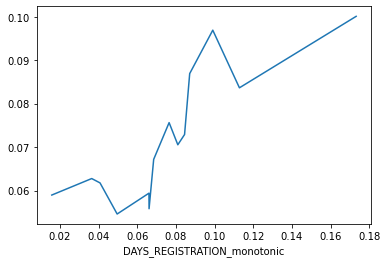

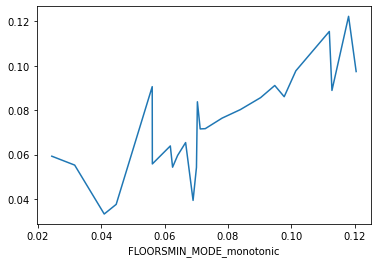

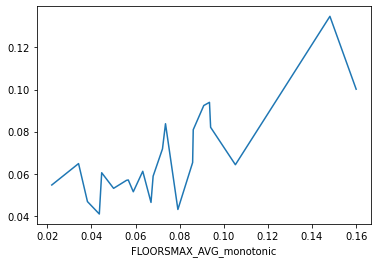

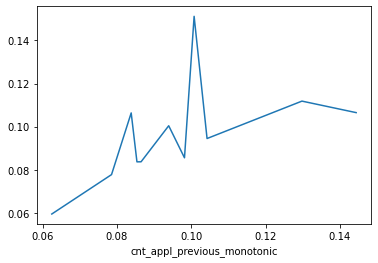

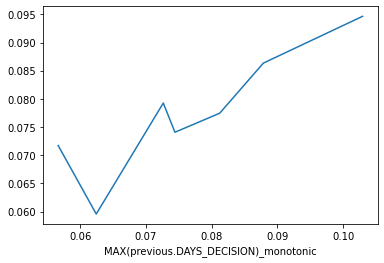

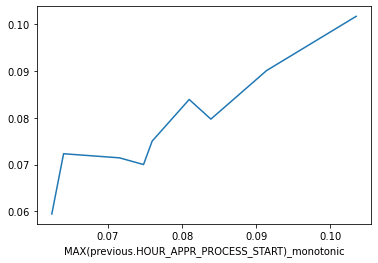

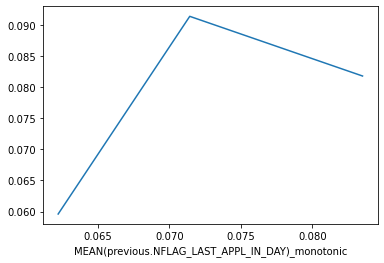

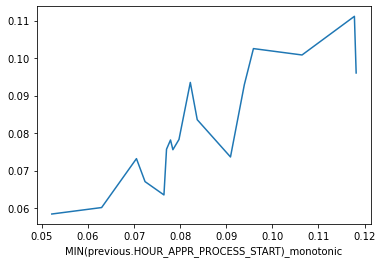

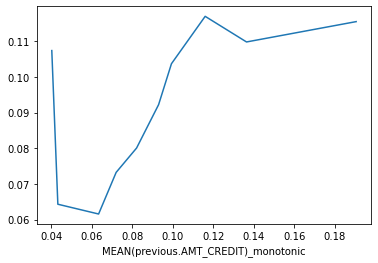

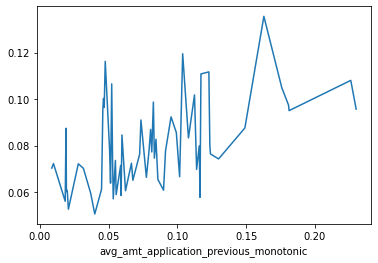

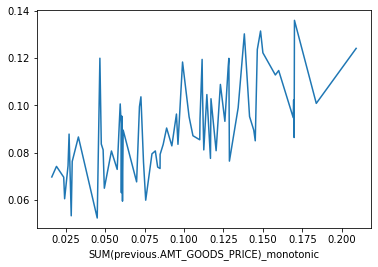

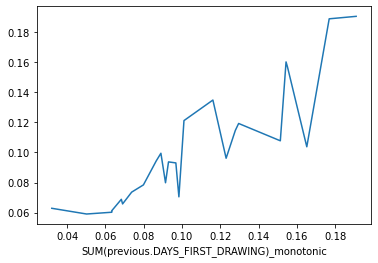

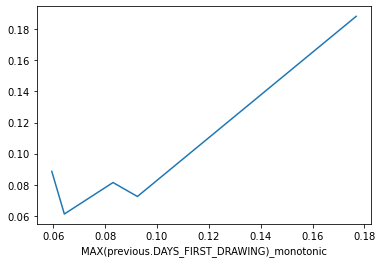

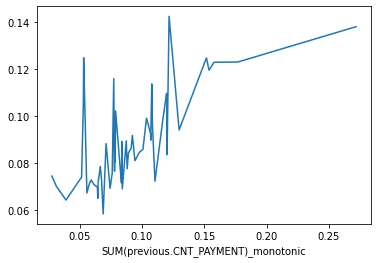

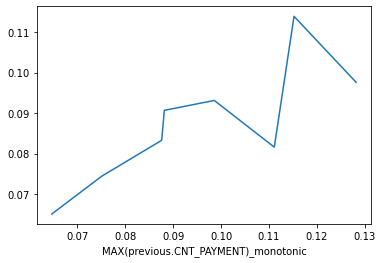

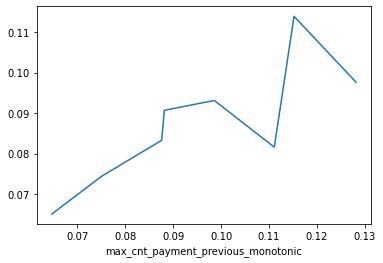

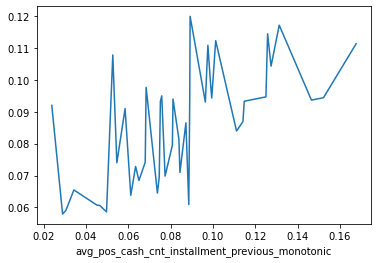

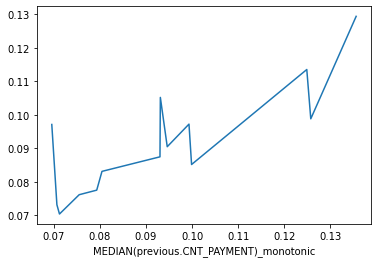

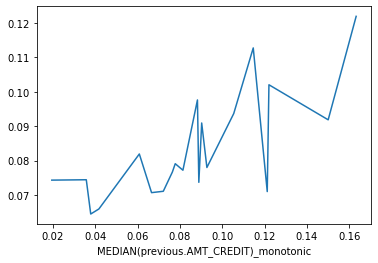

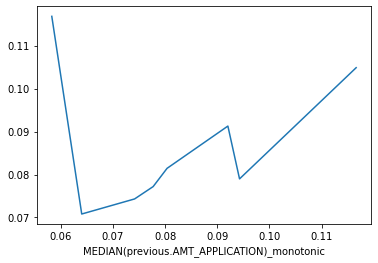

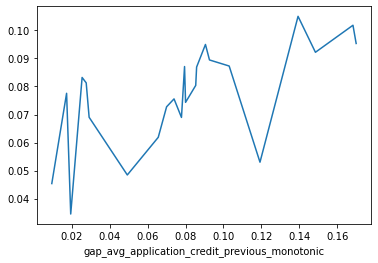

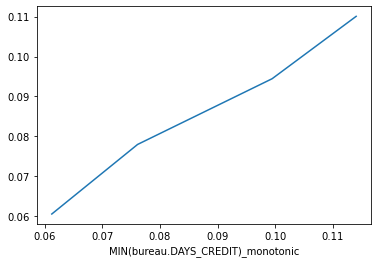

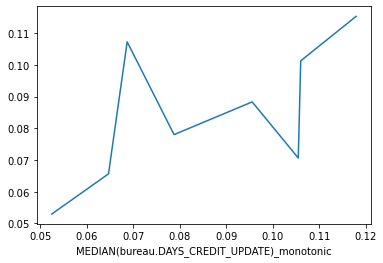

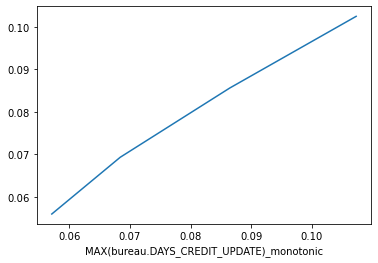

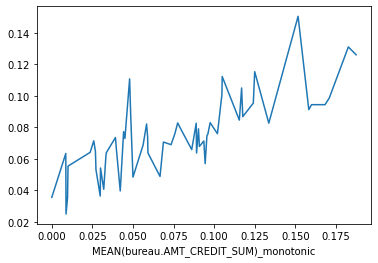

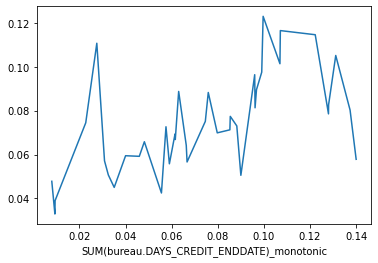

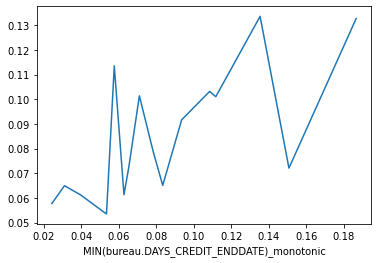

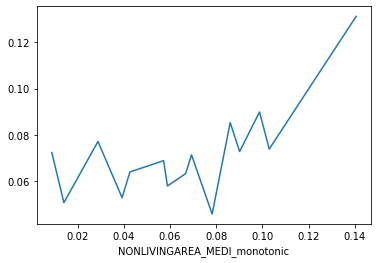

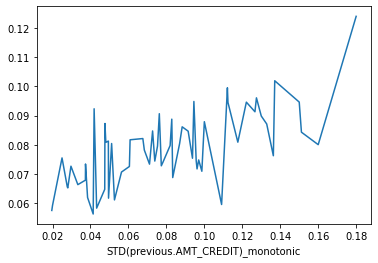

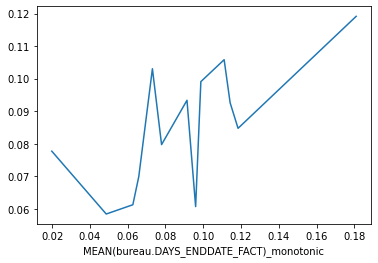

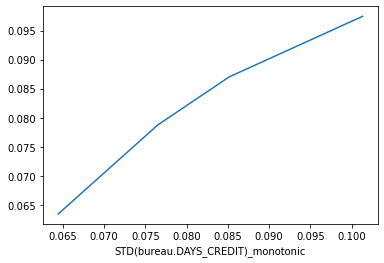

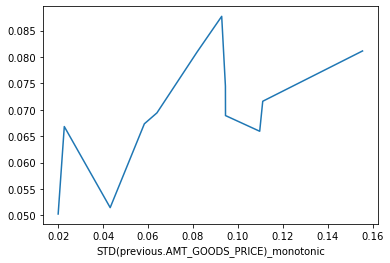

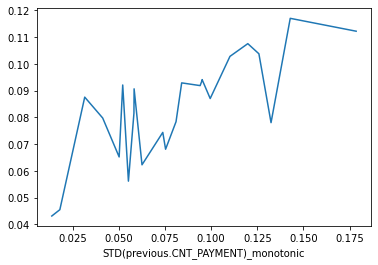

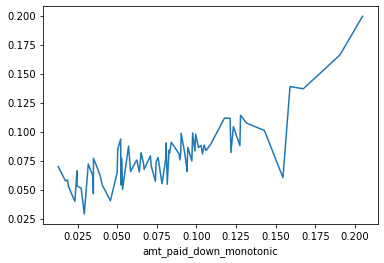

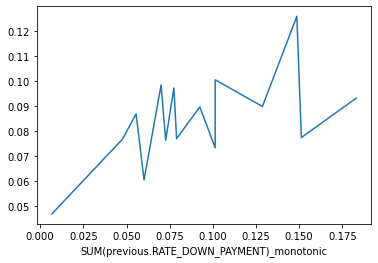

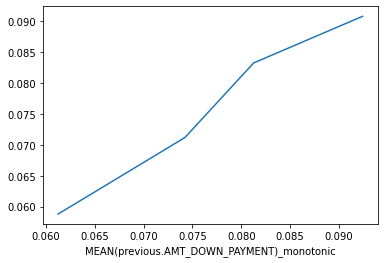

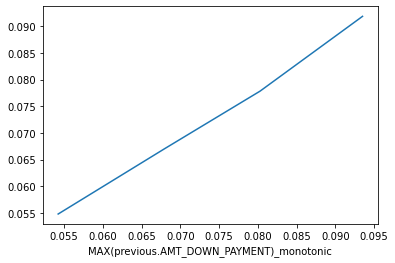

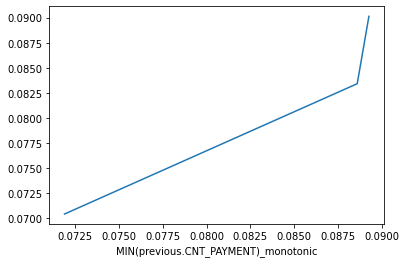

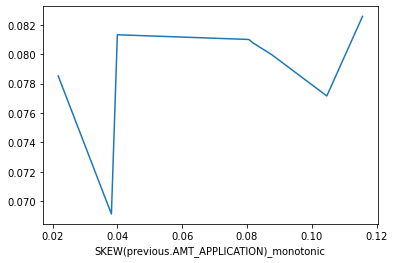

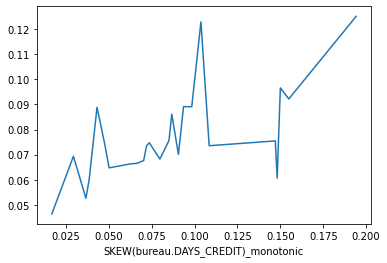

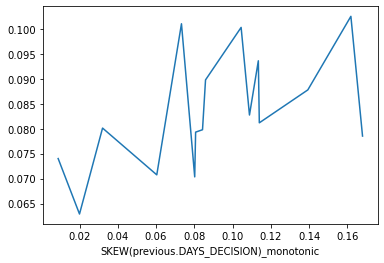

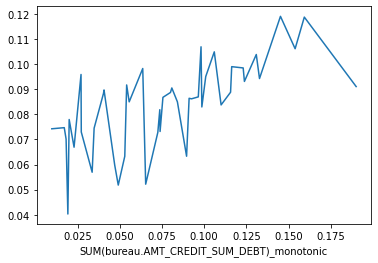

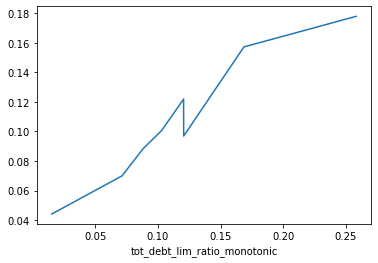

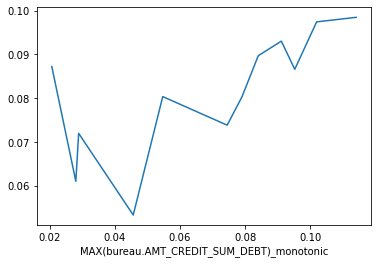

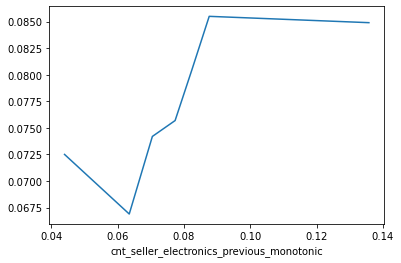

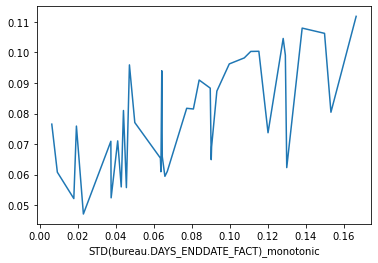

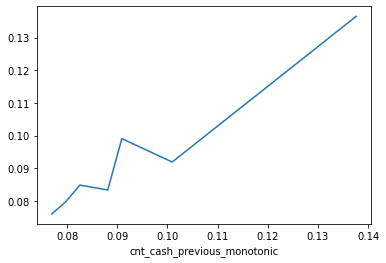

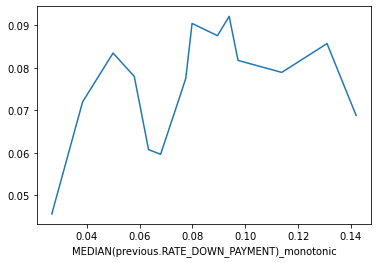

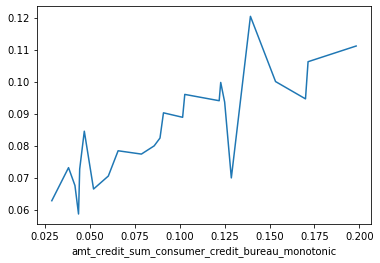

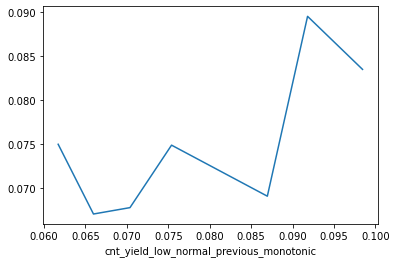

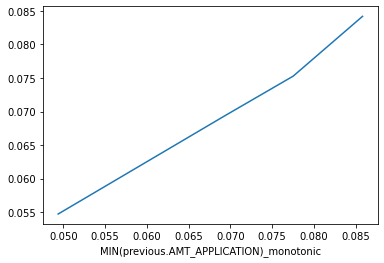

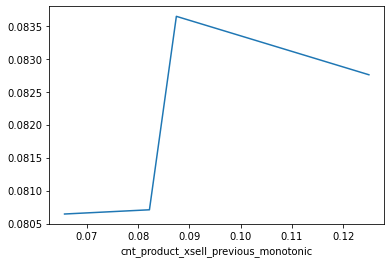

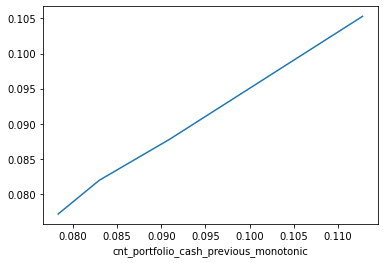

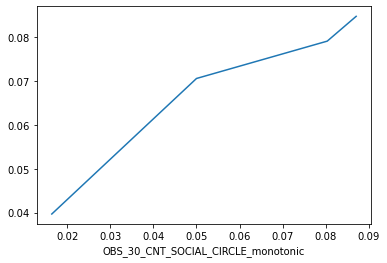

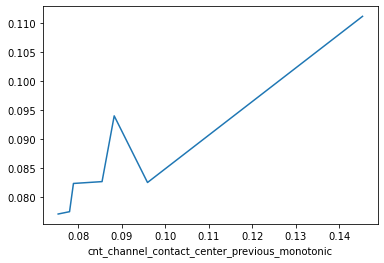

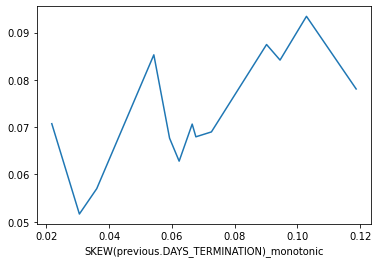

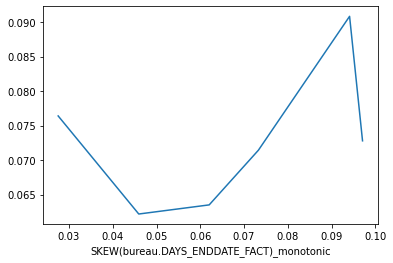

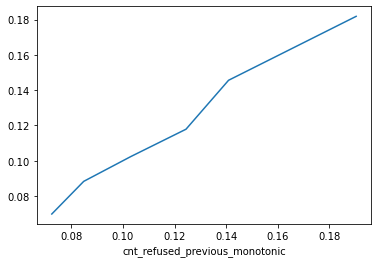

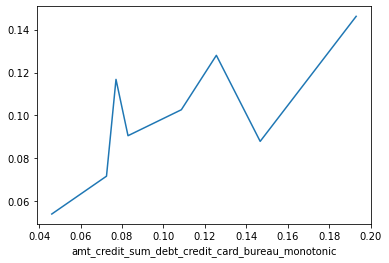

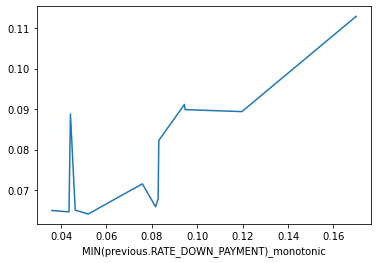

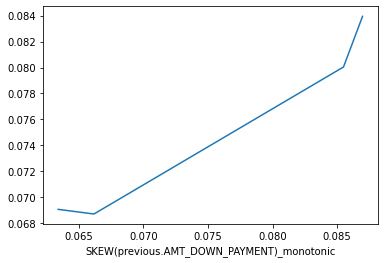

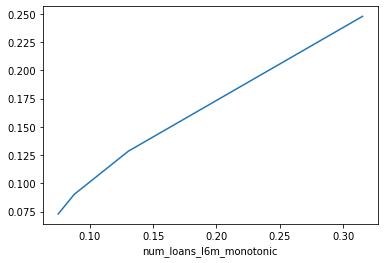

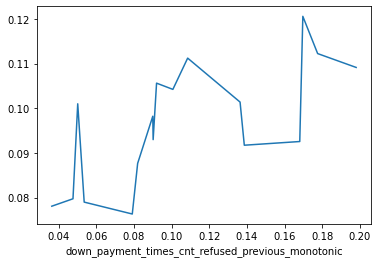

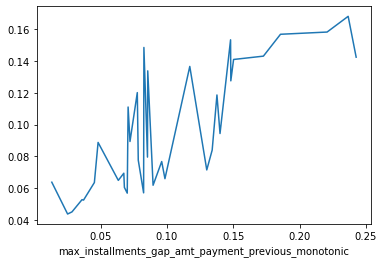

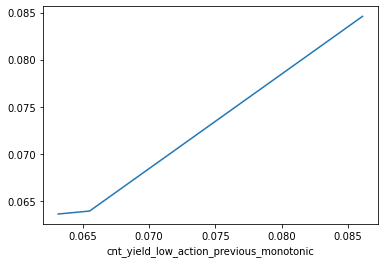

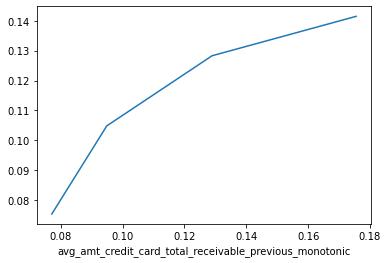

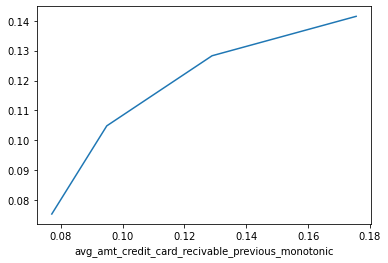

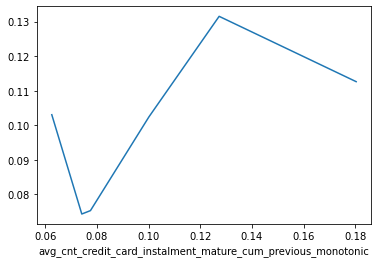

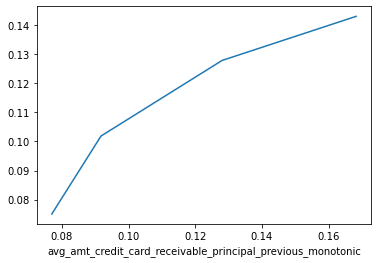

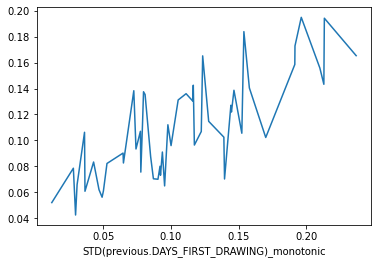

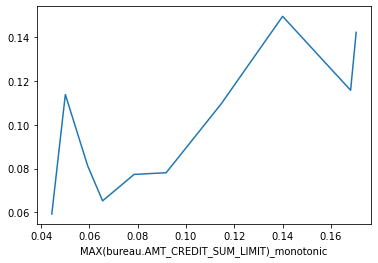

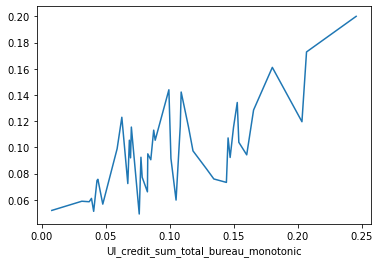

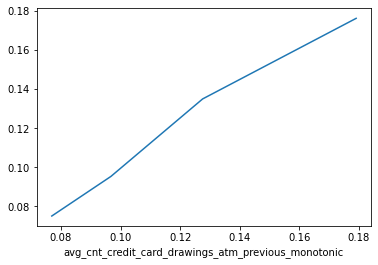

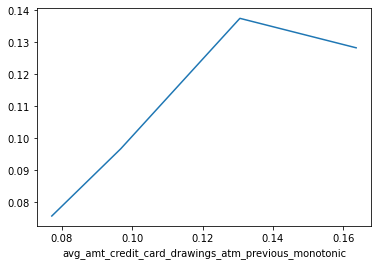

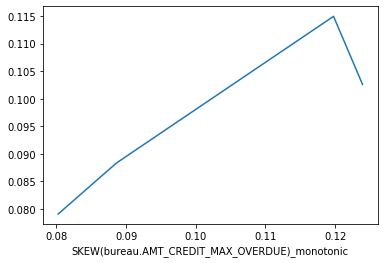

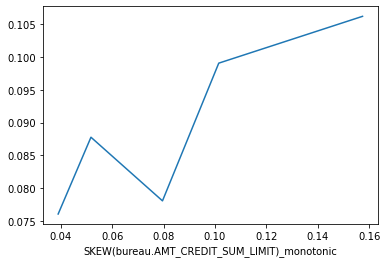

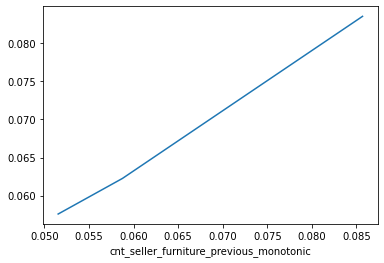

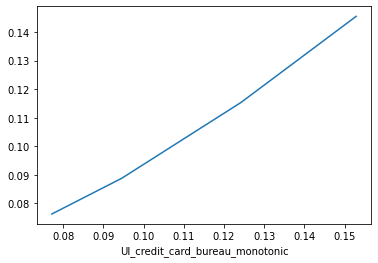

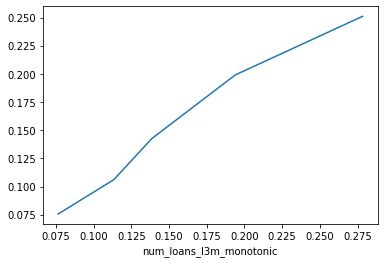

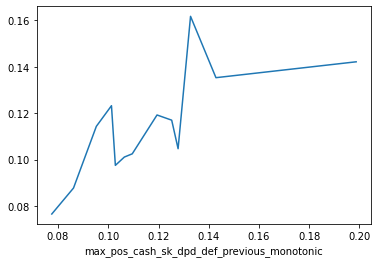

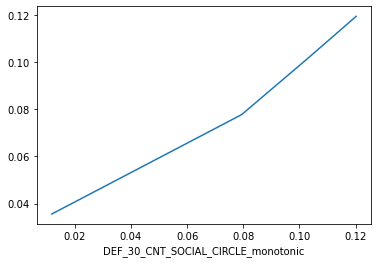

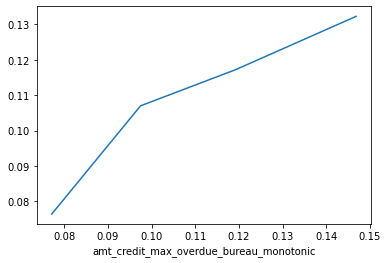

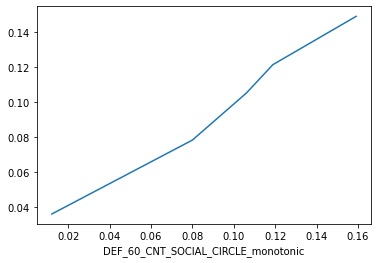

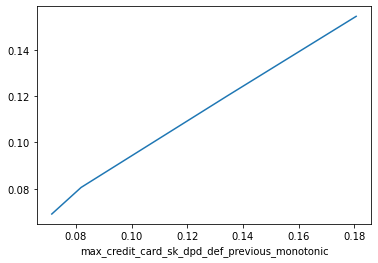

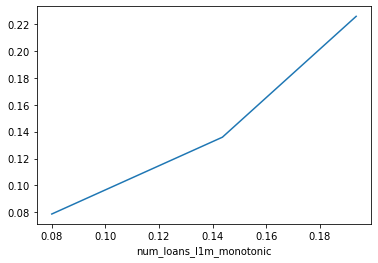

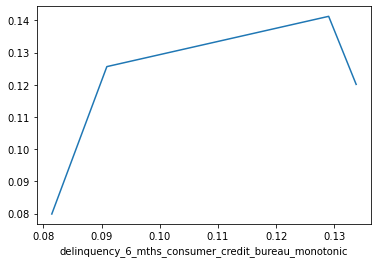

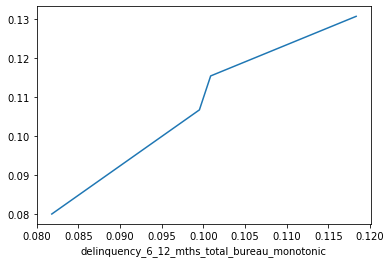

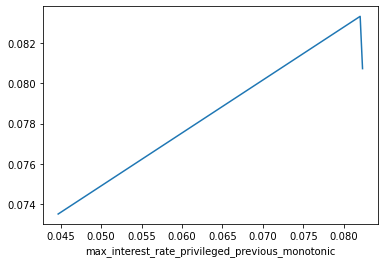

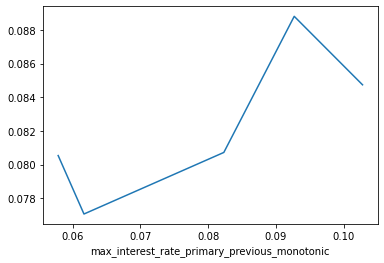

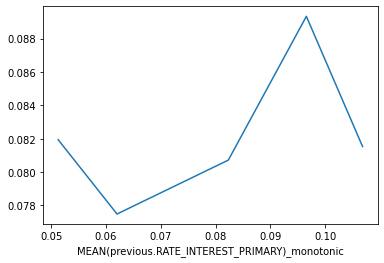

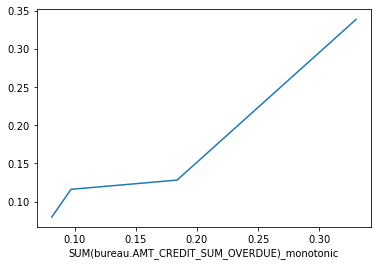

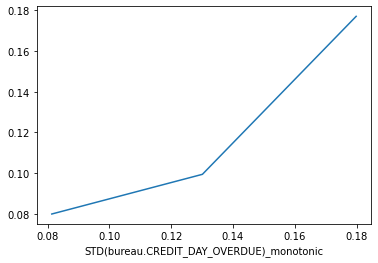

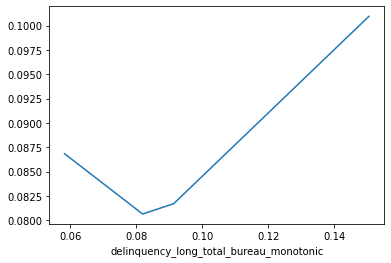

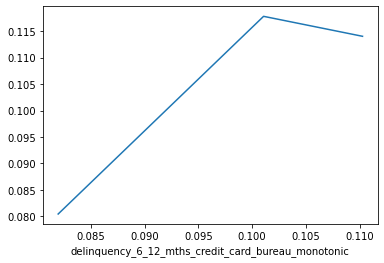

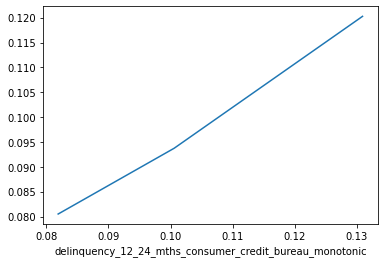

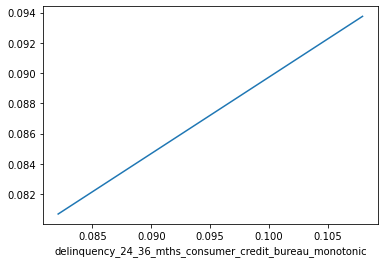

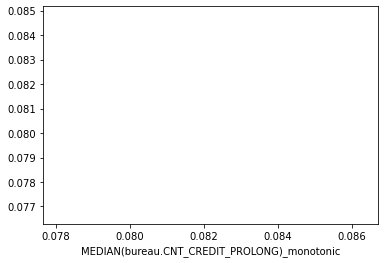

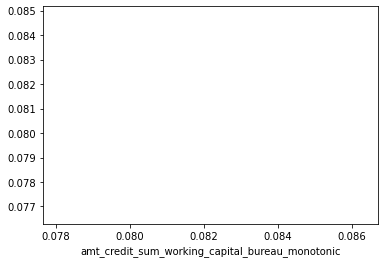

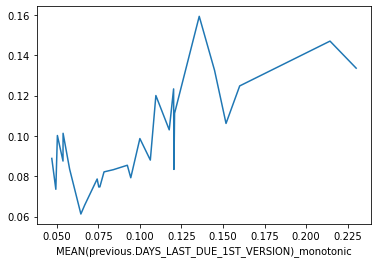

In [60]:
for feat in non_monotonic:

    fig = plt.figure()
    fig = data_transformed_1.groupby([feat+'_monotonic'])['TARGET'].mean().plot()

In [61]:
data_transformed_1.reset_index(inplace = False).to_csv("modelling_table_7_aux_v2.csv")

### Optimization of zero inflated features through Inverse Hiperbolic Sine Transformation

In [62]:
def select_feats(df, target):
    feats = df.columns
    selected = {}
    feats=feats.drop([target])
    for feat in feats:
        if((df[target].unique().sum() == 1)&(df[feat].unique().sum() == 1)):
            pvalue = chisquare(ma.masked_invalid(df[feat]), ma.masked_invalid(df[target]))[1]
            if(pvalue < 0.05):
                selected[feat]=pvalue
        if((df[target].unique().sum() == 1)&(df[feat].unique().sum() != 1)):
            pvalue = mannwhitneyu(ma.masked_invalid(df[df[target]==0][feat]),ma.masked_invalid(df[df[target]==1][feat]))[1]
            if(pvalue<0.05):
                selected[feat]=pvalue
        if((df[target].unique().sum() != 1)&(df[feat].unique().sum() == 1)):
            pvalue = mannwhitneyu(ma.masked_invalid(df[df[feat]==0][target]),ma.masked_invalid(df[df[feat]==1][target]))[1]
            if(pvalue<0.05):
                selected[feat]=pvalue
        if((df[target].unique().sum() != 1)&(df[feat].unique().sum() != 1)):
            correlation = np.abs(np.corrcoef(ma.masked_invalid(df[target]),ma.masked_invalid(df[feat])))[0][1]
            if(correlation>0.5):
                selected[feat]=correlation
    return selected

In [63]:
def transform_y(y, theta):
    return np.log((theta*y +((((theta*y)**2)+1)**0.5)))/theta

def log_likelihood(theta, x, y):
    n, p = x.shape
    lnjacobi = -0.5*np.log(1+(theta*y)**2).sum()
    trans_y = transform_y(y, theta)
    xtxinv = np.linalg.inv(np.dot(x.T, x))
    imxxtxinvxt = np.subtract(np.identity(n), np.dot(np.dot(x, xtxinv), x.T))
    rss = np.dot(np.dot(trans_y.T, imxxtxinvxt), trans_y)
    return -(n/2.0)*np.log(rss) + lnjacobi

def choose_opt_theta(x, y, feat_selected):
    potential_thetas = np.linspace(0.001, 1, 500)
    x=x[feat_selected]
    likelihoods = np.array([log_likelihood(theta, x, y) for theta in potential_thetas])
    opt_theta = potential_thetas[np.argmax(likelihoods)]
    return opt_theta


In [64]:
zero_inflated = ['LANDAREA_AVG',
 'LANDAREA_MEDI',
 'SUM(previous.DAYS_TERMINATION)',
 'SUM(previous.DAYS_FIRST_DUE)',
 'MEAN(previous.DAYS_TERMINATION)',
 'avg_pos_cash_cnt_installment_future_previous',
 'COUNT(bureau)',
 'cnt_contracts_bureau']

In [65]:
zeros = {feat: (data[feat]==0).sum()/(data[feat]).shape[0] for feat in zero_inflated}

In [66]:
zeros = sorted(zeros.items(), key=lambda x: x[1])

In [67]:
lista_zeros = [zeros[i][0] for i in range(len(zeros))]

In [68]:
lista_zeros

['LANDAREA_AVG',
 'LANDAREA_MEDI',
 'SUM(previous.DAYS_TERMINATION)',
 'SUM(previous.DAYS_FIRST_DUE)',
 'MEAN(previous.DAYS_TERMINATION)',
 'avg_pos_cash_cnt_installment_future_previous',
 'COUNT(bureau)',
 'cnt_contracts_bureau']

In [69]:
data_aux = data_transformed_1.drop(['TARGET'], axis = 1)

In [70]:
def inv_sinh_transform_theta_selection(df, lista_zeros):
    feat_theta = {}
    x = df
    for y in lista_zeros:
        selected = select_feats(x, y)
        feat_selected = list(selected.keys())
        opt_theta = choose_opt_theta(x, np.array(x[y]), feat_selected)
        feat_theta[y]=opt_theta
        print("working on feat: ", y, ": ", opt_theta)
    return feat_theta

In [75]:
df_sample = data_aux.sample(7000)

In [76]:
feat_theta_ = inv_sinh_transform_theta_selection(df_sample, lista_zeros)

C:\Anaconda3\envs\benedito_deep\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Anaconda3\envs\benedito_deep\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Anaconda3\envs\benedito_deep\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Anaconda3\envs\benedito_deep\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Anaconda3\envs\benedito_deep\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Anaconda3\envs\benedito_deep\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Anaconda3\envs\bene

working on feat:  LANDAREA_AVG :  0.2792785571142285


C:\Anaconda3\envs\benedito_deep\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Anaconda3\envs\benedito_deep\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Anaconda3\envs\benedito_deep\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Anaconda3\envs\benedito_deep\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Anaconda3\envs\benedito_deep\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Anaconda3\envs\benedito_deep\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Anaconda3\envs\bene

working on feat:  LANDAREA_MEDI :  0.5855851703406814


C:\Anaconda3\envs\benedito_deep\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Anaconda3\envs\benedito_deep\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Anaconda3\envs\benedito_deep\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Anaconda3\envs\benedito_deep\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Anaconda3\envs\benedito_deep\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Anaconda3\envs\benedito_deep\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Anaconda3\envs\bene

working on feat:  SUM(previous.DAYS_TERMINATION) :  0.0030020040080160322


C:\Anaconda3\envs\benedito_deep\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Anaconda3\envs\benedito_deep\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Anaconda3\envs\benedito_deep\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Anaconda3\envs\benedito_deep\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Anaconda3\envs\benedito_deep\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Anaconda3\envs\benedito_deep\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Anaconda3\envs\bene

working on feat:  SUM(previous.DAYS_FIRST_DUE) :  0.0030020040080160322


C:\Anaconda3\envs\benedito_deep\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Anaconda3\envs\benedito_deep\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Anaconda3\envs\benedito_deep\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Anaconda3\envs\benedito_deep\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Anaconda3\envs\benedito_deep\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Anaconda3\envs\benedito_deep\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Anaconda3\envs\bene

working on feat:  MEAN(previous.DAYS_TERMINATION) :  0.0030020040080160322


C:\Anaconda3\envs\benedito_deep\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Anaconda3\envs\benedito_deep\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Anaconda3\envs\benedito_deep\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Anaconda3\envs\benedito_deep\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Anaconda3\envs\benedito_deep\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Anaconda3\envs\benedito_deep\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Anaconda3\envs\bene

working on feat:  avg_pos_cash_cnt_installment_future_previous :  0.001


C:\Anaconda3\envs\benedito_deep\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Anaconda3\envs\benedito_deep\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Anaconda3\envs\benedito_deep\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Anaconda3\envs\benedito_deep\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Anaconda3\envs\benedito_deep\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Anaconda3\envs\benedito_deep\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Anaconda3\envs\bene

working on feat:  COUNT(bureau) :  0.3233226452905812


C:\Anaconda3\envs\benedito_deep\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Anaconda3\envs\benedito_deep\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Anaconda3\envs\benedito_deep\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Anaconda3\envs\benedito_deep\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Anaconda3\envs\benedito_deep\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Anaconda3\envs\benedito_deep\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Anaconda3\envs\bene

working on feat:  cnt_contracts_bureau :  0.6276272545090181


In [77]:
feat_theta_

{'LANDAREA_AVG': 0.2792785571142285,
 'LANDAREA_MEDI': 0.5855851703406814,
 'SUM(previous.DAYS_TERMINATION)': 0.0030020040080160322,
 'SUM(previous.DAYS_FIRST_DUE)': 0.0030020040080160322,
 'MEAN(previous.DAYS_TERMINATION)': 0.0030020040080160322,
 'avg_pos_cash_cnt_installment_future_previous': 0.001,
 'COUNT(bureau)': 0.3233226452905812,
 'cnt_contracts_bureau': 0.6276272545090181}

In [78]:
for feat in list(feat_theta_.keys()):
    data_transformed_1[feat+'_transformed']=transform_y(data_transformed_1[feat], feat_theta_[feat])
    data_transformed_1=data_transformed_1.drop([feat], axis =1)
   

In [79]:
data_transformed_1.reset_index(inplace=False).to_csv("modelling_table_7_transformed_v2.csv")

In [80]:
df_final = pd.read_csv("modelling_table_7_transformed_v2.csv")

## Categorical variables' playoff

In [81]:
categorical_feats = ['MODE(previous.CHANNEL_TYPE)',
'MODE(previous.CODE_REJECT_REASON)',
'MODE(previous.FLAG_LAST_APPL_PER_CONTRACT)',
'MODE(previous.NAME_CASH_LOAN_PURPOSE)',
'MODE(previous.NAME_CLIENT_TYPE)',
'MODE(previous.NAME_CONTRACT_STATUS)',
'MODE(previous.NAME_CONTRACT_TYPE)',
'MODE(previous.NAME_GOODS_CATEGORY)',
'MODE(previous.NAME_PAYMENT_TYPE)',
'MODE(previous.NAME_PORTFOLIO)',
'MODE(previous.NAME_PRODUCT_TYPE)',
'MODE(previous.NAME_SELLER_INDUSTRY)',
'MODE(previous.NAME_TYPE_SUITE)',
'MODE(previous.NAME_YIELD_GROUP)',
'MODE(previous.PRODUCT_COMBINATION)',
'MODE(previous.WEEKDAY_APPR_PROCESS_START)',
'N_MOST_COMMON(previous.CHANNEL_TYPE)[0]',
'N_MOST_COMMON(previous.CHANNEL_TYPE)[1]',
'N_MOST_COMMON(previous.CHANNEL_TYPE)[2]',
'N_MOST_COMMON(previous.CODE_REJECT_REASON)[0]',
'N_MOST_COMMON(previous.CODE_REJECT_REASON)[1]',
'N_MOST_COMMON(previous.CODE_REJECT_REASON)[2]',
'N_MOST_COMMON(previous.FLAG_LAST_APPL_PER_CONTRACT)[0]',
'N_MOST_COMMON(previous.FLAG_LAST_APPL_PER_CONTRACT)[1]',
'N_MOST_COMMON(previous.NAME_CASH_LOAN_PURPOSE)[0]',
'N_MOST_COMMON(previous.NAME_CASH_LOAN_PURPOSE)[1]',
'N_MOST_COMMON(previous.NAME_CASH_LOAN_PURPOSE)[2]',
'N_MOST_COMMON(previous.NAME_CLIENT_TYPE)[0]',
'N_MOST_COMMON(previous.NAME_CLIENT_TYPE)[1]',
'N_MOST_COMMON(previous.NAME_CLIENT_TYPE)[2]',
'N_MOST_COMMON(previous.NAME_CONTRACT_STATUS)[0]',
'N_MOST_COMMON(previous.NAME_CONTRACT_STATUS)[1]',
'N_MOST_COMMON(previous.NAME_CONTRACT_STATUS)[2]',
'N_MOST_COMMON(previous.NAME_CONTRACT_TYPE)[0]',
'N_MOST_COMMON(previous.NAME_CONTRACT_TYPE)[1]',
'N_MOST_COMMON(previous.NAME_CONTRACT_TYPE)[2]',
'N_MOST_COMMON(previous.NAME_GOODS_CATEGORY)[0]',
'N_MOST_COMMON(previous.NAME_GOODS_CATEGORY)[1]',
'N_MOST_COMMON(previous.NAME_GOODS_CATEGORY)[2]',
'N_MOST_COMMON(previous.NAME_PAYMENT_TYPE)[0]',
'N_MOST_COMMON(previous.NAME_PAYMENT_TYPE)[1]',
'N_MOST_COMMON(previous.NAME_PAYMENT_TYPE)[2]',
'N_MOST_COMMON(previous.NAME_PORTFOLIO)[0]',
'N_MOST_COMMON(previous.NAME_PORTFOLIO)[1]',
'N_MOST_COMMON(previous.NAME_PORTFOLIO)[2]',
'N_MOST_COMMON(previous.NAME_PRODUCT_TYPE)[0]',
'N_MOST_COMMON(previous.NAME_PRODUCT_TYPE)[1]',
'N_MOST_COMMON(previous.NAME_PRODUCT_TYPE)[2]',
'N_MOST_COMMON(previous.NAME_SELLER_INDUSTRY)[0]',
'N_MOST_COMMON(previous.NAME_SELLER_INDUSTRY)[1]',
'N_MOST_COMMON(previous.NAME_SELLER_INDUSTRY)[2]',
'N_MOST_COMMON(previous.NAME_TYPE_SUITE)[0]',
'N_MOST_COMMON(previous.NAME_TYPE_SUITE)[1]',
'N_MOST_COMMON(previous.NAME_TYPE_SUITE)[2]',
'N_MOST_COMMON(previous.NAME_YIELD_GROUP)[0]',
'N_MOST_COMMON(previous.NAME_YIELD_GROUP)[1]',
'N_MOST_COMMON(previous.NAME_YIELD_GROUP)[2]',
'N_MOST_COMMON(previous.PRODUCT_COMBINATION)[0]',
'N_MOST_COMMON(previous.PRODUCT_COMBINATION)[1]',
'N_MOST_COMMON(previous.PRODUCT_COMBINATION)[2]',
'N_MOST_COMMON(previous.WEEKDAY_APPR_PROCESS_START)[0]',
'N_MOST_COMMON(previous.WEEKDAY_APPR_PROCESS_START)[1]',
'N_MOST_COMMON(previous.WEEKDAY_APPR_PROCESS_START)[2]',
'MODE(bureau.CREDIT_ACTIVE)',
'MODE(bureau.CREDIT_CURRENCY)',
'MODE(bureau.CREDIT_TYPE)',
'N_MOST_COMMON(bureau.CREDIT_ACTIVE)[0]',
'N_MOST_COMMON(bureau.CREDIT_ACTIVE)[1]',
'N_MOST_COMMON(bureau.CREDIT_ACTIVE)[2]',
'N_MOST_COMMON(bureau.CREDIT_CURRENCY)[0]',
'N_MOST_COMMON(bureau.CREDIT_CURRENCY)[1]',
'N_MOST_COMMON(bureau.CREDIT_CURRENCY)[2]',
'N_MOST_COMMON(bureau.CREDIT_TYPE)[0]',
'N_MOST_COMMON(bureau.CREDIT_TYPE)[1]',
'N_MOST_COMMON(bureau.CREDIT_TYPE)[2]']

In [82]:
df_5 = pd.read_csv("modelling_table5.csv")

C:\Anaconda3\envs\benedito_deep\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (623,625,626,629) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [83]:
data = df_5

In [84]:
data[categorical_feats].fillna("no_info", inplace = True)

C:\Anaconda3\envs\benedito_deep\lib\site-packages\pandas\core\frame.py:4323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [85]:
def check_string(x):
    if x in ('NaN', 'NA', 'n/a', 'N/A', 'inf', '-inf', 'Inf', '-Inf'):
        return True
    else:
        return False
    
def fill_cat(df, lista_cat):
    for cat_feat in lista_cat:
        df.loc[pd.isna(df[cat_feat]), cat_feat] = 'no_info'
        df.loc[df[cat_feat].isnull(), cat_feat] = 'no_info'
        df.loc[df[cat_feat].apply(check_string), cat_feat] = 'no_info'
    return df

In [86]:
data = fill_cat(data, categorical_feats)
data.fillna(0, inplace = True)

In [87]:
data = data.drop(['Unnamed: 0'], axis = 1)
data.set_index('SK_ID_CURR', inplace=True)
data = data.replace([np.inf, -np.inf], 0)
data = data.loc[:,categorical_feats+['TARGET']]
data = pd.get_dummies(data, columns = categorical_feats, drop_first = True)

In [88]:
data.head()

,TARGET,MODE(previous.CHANNEL_TYPE)_Car dealer,MODE(previous.CHANNEL_TYPE)_Channel of corporate sales,MODE(previous.CHANNEL_TYPE)_Contact center,MODE(previous.CHANNEL_TYPE)_Country-wide,MODE(previous.CHANNEL_TYPE)_Credit and cash offices,MODE(previous.CHANNEL_TYPE)_Regional / Local,MODE(previous.CHANNEL_TYPE)_Stone,MODE(previous.CHANNEL_TYPE)_no_info,MODE(previous.CODE_REJECT_REASON)_HC,MODE(previous.CODE_REJECT_REASON)_LIMIT,MODE(previous.CODE_REJECT_REASON)_SCO,MODE(previous.CODE_REJECT_REASON)_SCOFR,MODE(previous.CODE_REJECT_REASON)_SYSTEM,MODE(previous.CODE_REJECT_REASON)_VERIF,MODE(previous.CODE_REJECT_REASON)_XAP,MODE(previous.CODE_REJECT_REASON)_XNA,MODE(previous.CODE_REJECT_REASON)_no_info,MODE(previous.FLAG_LAST_APPL_PER_CONTRACT)_Y,MODE(previous.FLAG_LAST_APPL_PER_CONTRACT)_no_info,MODE(previous.NAME_CASH_LOAN_PURPOSE)_Business development,MODE(previous.NAME_CASH_LOAN_PURPOSE)_Buying a garage,MODE(previous.NAME_CASH_LOAN_PURPOSE)_Buying a holiday home / land,MODE(previous.NAME_CASH_LOAN_PURPOSE)_Buying a home,MODE(previous.NAME_CASH_LOAN_PURPOSE)_Buying a new car,MODE(previous.NAME_CASH_LOAN_PURPOSE)_Buying a used car,MODE(previous.NAME_CASH_LOAN_PURPOSE)_Car repairs,MODE(previous.NAME_CASH_LOAN_PURPOSE)_Education,MODE(previous.NAME_CASH_LOAN_PURPOSE)_Everyday expenses,MODE(previous.NAME_CASH_LOAN_PURPOSE)_Furniture,MODE(previous.NAME_CASH_LOAN_PURPOSE)_Gasification / water supply,MODE(previous.NAME_CASH_LOAN_PURPOSE)_Hobby,MODE(previous.NAME_CASH_LOAN_PURPOSE)_Journey,MODE(previous.NAME_CASH_LOAN_PURPOSE)_Medicine,MODE(previous.NAME_CASH_LOAN_PURPOSE)_Money for a third person,MODE(previous.NAME_CASH_LOAN_PURPOSE)_Other,MODE(previous.NAME_CASH_LOAN_PURPOSE)_Payments on other loans,MODE(previous.NAME_CASH_LOAN_PURPOSE)_Purchase of electronic equipment,MODE(previous.NAME_CASH_LOAN_PURPOSE)_Refusal to name the goal,MODE(previous.NAME_CASH_LOAN_PURPOSE)_Repairs,MODE(previous.NAME_CASH_LOAN_PURPOSE)_Urgent needs,MODE(previous.NAME_CASH_LOAN_PURPOSE)_Wedding / gift / holiday,MODE(previous.NAME_CASH_LOAN_PURPOSE)_XAP,MODE(previous.NAME_CASH_LOAN_PURPOSE)_XNA,MODE(previous.NAME_CASH_LOAN_PURPOSE)_no_info,MODE(previous.NAME_CLIENT_TYPE)_Refreshed,MODE(previous.NAME_CLIENT_TYPE)_Repeater,MODE(previous.NAME_CLIENT_TYPE)_XNA,MODE(previous.NAME_CLIENT_TYPE)_no_info,MODE(previous.NAME_CONTRACT_STATUS)_Canceled,MODE(previous.NAME_CONTRACT_STATUS)_Refused,MODE(previous.NAME_CONTRACT_STATUS)_Unused offer,MODE(previous.NAME_CONTRACT_STATUS)_no_info,MODE(previous.NAME_CONTRACT_TYPE)_Consumer loans,MODE(previous.NAME_CONTRACT_TYPE)_Revolving loans,MODE(previous.NAME_CONTRACT_TYPE)_XNA,MODE(previous.NAME_CONTRACT_TYPE)_no_info,MODE(previous.NAME_GOODS_CATEGORY)_Audio/Video,MODE(previous.NAME_GOODS_CATEGORY)_Auto Accessories,MODE(previous.NAME_GOODS_CATEGORY)_Clothing and Accessories,MODE(previous.NAME_GOODS_CATEGORY)_Computers,MODE(previous.NAME_GOODS_CATEGORY)_Construction Materials,MODE(previous.NAME_GOODS_CATEGORY)_Consumer Electronics,MODE(previous.NAME_GOODS_CATEGORY)_Direct Sales,MODE(previous.NAME_GOODS_CATEGORY)_Education,MODE(previous.NAME_GOODS_CATEGORY)_Fitness,MODE(previous.NAME_GOODS_CATEGORY)_Furniture,MODE(previous.NAME_GOODS_CATEGORY)_Gardening,MODE(previous.NAME_GOODS_CATEGORY)_Homewares,MODE(previous.NAME_GOODS_CATEGORY)_Insurance,MODE(previous.NAME_GOODS_CATEGORY)_Jewelry,MODE(previous.NAME_GOODS_CATEGORY)_Medical Supplies,MODE(previous.NAME_GOODS_CATEGORY)_Medicine,MODE(previous.NAME_GOODS_CATEGORY)_Mobile,MODE(previous.NAME_GOODS_CATEGORY)_Office Appliances,MODE(previous.NAME_GOODS_CATEGORY)_Other,MODE(previous.NAME_GOODS_CATEGORY)_Photo / Cinema Equipment,MODE(previous.NAME_GOODS_CATEGORY)_Sport and Leisure,MODE(previous.NAME_GOODS_CATEGORY)_Tourism,MODE(previous.NAME_GOODS_CATEGORY)_Vehicles,MODE(previous.NAME_GOODS_CATEGORY)_Weapon,MODE(previous.NAME_GOODS_CATEGORY)_XNA,MODE(previous.NAME_GOODS_CATEGORY)_no_info,MODE(previous.NAME_PAYMENT_TYPE)_Cashless from the account of the employer,MODE(previous.NAME_PAYMENT_T

In [89]:
np.random.seed(11235)
sample = data.sample(100000, random_state = 11235)
X = sample.drop(['TARGET'], axis =1)
feats=X.columns
y = sample['TARGET']

In [90]:
model = RandomForestClassifier(max_depth = 6, min_samples_split=50, min_samples_leaf = 100,n_estimators=200,
                              min_impurity_decrease=1e-07)
scaler = StandardScaler()

In [91]:
X=scaler.fit_transform(X)
model.fit(X, y)

RandomForestClassifier(max_depth=6, min_impurity_decrease=1e-07,
                       min_samples_leaf=100, min_samples_split=50,
                       n_estimators=200)

In [92]:
acc_train = metrics_sk.accuracy_score(y, (model.predict(X)))
f1_train = metrics_sk.f1_score(y, (model.predict(X)))
precision_train = metrics_sk.precision_score(y, (model.predict(X)))
recall_train = metrics_sk.recall_score(y, (model.predict(X)))
auc_train = metrics_sk.roc_auc_score(y, model.predict_proba(X)[:,1])

print('accuracy_train: ',acc_train)
print('precision_train: ',precision_train)
print('recall_train: ',recall_train)
print('F1_train: ',f1_train)
print('AUC_train: ',auc_train)

C:\Anaconda3\envs\benedito_deep\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuracy_train:  0.91877
precision_train:  0.0
recall_train:  0.0
F1_train:  0.0
AUC_train:  0.6376544655386733


In [93]:
vars_ = feats
coefs = model.feature_importances_
importance = {vars_[i]: coefs[i] for i in range(len(vars_))}

In [94]:
importance = dict(sorted(importance.items(), key=lambda x: x[1], reverse=True)[:-1])

In [95]:
selected = {feat: importances for feat, importances in importance.items() if importance[feat]>=0.005}

In [96]:
selected_ = list(selected.keys())

In [97]:
data = data[selected_]

In [98]:
data.head()

,N_MOST_COMMON(bureau.CREDIT_ACTIVE)[0]_Closed,MODE(bureau.CREDIT_ACTIVE)_Closed,N_MOST_COMMON(previous.NAME_CONTRACT_STATUS)[0]_Refused,MODE(previous.NAME_CONTRACT_STATUS)_Refused,N_MOST_COMMON(previous.CODE_REJECT_REASON)[1]_no_info,N_MOST_COMMON(previous.CODE_REJECT_REASON)[2]_no_info,N_MOST_COMMON(previous.NAME_PRODUCT_TYPE)[1]_walk-in,N_MOST_COMMON(previous.NAME_CASH_LOAN_PURPOSE)[2]_no_info,N_MOST_COMMON(bureau.CREDIT_ACTIVE)[1]_Closed,N_MOST_COMMON(previous.CODE_REJECT_REASON)[1]_XAP,N_MOST_COMMON(previous.CODE_REJECT_REASON)[1]_SCOFR,MODE(previous.CODE_REJECT_REASON)_HC,N_MOST_COMMON(previous.NAME_PRODUCT_TYPE)[0]_walk-in,N_MOST_COMMON(previous.NAME_PRODUCT_TYPE)[2]_x-sell,N_MOST_COMMON(bureau.CREDIT_TYPE)[0]_no_info,MODE(bureau.CREDIT_TYPE)_Consumer credit,N_MOST_COMMON(previous.NAME_CONTRACT_STATUS)[2]_no_info,MODE(bureau.CREDIT_CURRENCY)_no_info,N_MOST_COMMON(bureau.CREDIT_TYPE)[0]_Consumer credit,N_MOST_COMMON(previous.NAME_PRODUCT_TYPE)[2]_no_info,N_MOST_COMMON(previous.CODE_REJECT_REASON)[0]_XAP,MODE(previous.NAME_YIELD_GROUP)_low_normal,MODE(previous.NAME_PAYMENT_TYPE)_XNA,N_MOST_COMMON(previous.NAME_CONTRACT_STATUS)[1]_no_info,MODE(previous.NAME_PRODUCT_TYPE)_walk-in,MODE(previous.CODE_REJECT_REASON)_XAP,N_MOST_COMMON(bureau.CREDIT_ACTIVE)[0]_no_info,N_MOST_COMMON(previous.NAME_PAYMENT_TYPE)[0]_XNA,N_MOST_COMMON(previous.CODE_REJECT_REASON)[0]_SCOFR,MODE(bureau.CREDIT_TYPE)_no_info,N_MOST_COMMON(bureau.CREDIT_CURRENCY)[0]_no_info,MODE(bureau.CREDIT_ACTIVE)_no_info,N_MOST_COMMON(previous.NAME_PORTFOLIO)[0]_POS,N_MOST_COMMON(previous.NAME_CLIENT_TYPE)[1]_no_info,MODE(previous.CODE_REJECT_REASON)_SCOFR,N_MOST_COMMON(previous.NAME_YIELD_GROUP)[0]_low_normal,N_MOST_COMMON(previous.CODE_REJECT_REASON)[0]_HC,N_MOST_COMMON(previous.CODE_REJECT_REASON)[2]_XAP,N_MOST_COMMON(previous.NAME_PORTFOLIO)[0]_XNA,N_MOST_COMMON(previous.NAME_TYPE_SUITE)[1]_no_info,MODE(previous.PRODUCT_COMBINATION)_POS mobile with interest
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
226605,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0
198289,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
119805,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,0,0,1,0,1,1,0,0,1,1,1,1,1,0,0,0,0,0,0,0
104932,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
383641,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [99]:
df_final = df_final.drop(['Unnamed: 0'], axis =1)

In [100]:
df_final.set_index(['SK_ID_CURR'], inplace = True)

In [101]:
df_final_total = pd.merge(df_final.reset_index(), data.reset_index(), how = 'left')

In [102]:
df_final_total.to_csv("modelling_table_8_v2.csv")